# Check version of some libraries

All the files (simulator, data, drive, training) to run on the Udacity simulator are on my Github.

In [ ]:
# Check version of Tensorflow
!pip install --upgrade tensorflow==2.2.0
!pip install --upgrade keras==2.3.1
!pip install --upgrade opencv-python==4.2.0.34



In [2]:
import tensorflow
ver1 = tensorflow.__version__ 
print("Version of Tensorflow is:", ver1)

# Check version of Keras
import keras
ver2 = keras.__version__ 
print("Version of Keras is:",ver2)

Version of Tensorflow is: 2.2.0
Version of Keras is: 2.3.1


# Data Processing

In [3]:
import os.path
DATA_DIR = './data/'
print(os.listdir(path=DATA_DIR))

IMG_DIR = DATA_DIR + "IMG/"
print(IMG_DIR)

['driving_log.csv', 'IMG']
../input/udacity-simulator-steering-angle-data/data/IMG/


In [4]:
# Data analysis
import glob
imgs = glob.glob(IMG_DIR + "*.jpg")
# Show number of images dataset
print(len(imgs))

24108


In [2]:
import pandas as pd
# Use pandas to read csv file dataset
df = pd.read_csv('./data/driving_log.csv')
# Show some samples of dataset
df.tail()

,center,left,right,steering,throttle,brake,speed
8031,IMG/center_2016_12_01_13_46_38_745.jpg,IMG/left_2016_12_01_13_46_38_745.jpg,IMG/right_2016_12_01_13_46_38_745.jpg,0.0,0.0,0.0,1.402436
8032,IMG/center_2016_12_01_13_46_38_802.jpg,IMG/left_2016_12_01_13_46_38_802.jpg,IMG/right_2016_12_01_13_46_38_802.jpg,0.0,0.0,0.0,1.393976
8033,IMG/center_2016_12_01_13_46_38_846.jpg,IMG/left_2016_12_01_13_46_38_846.jpg,IMG/right_2016_12_01_13_46_38_846.jpg,0.0,0.0,0.0,1.388364
8034,IMG/center_2016_12_01_13_46_38_922.jpg,IMG/left_2016_12_01_13_46_38_922.jpg,IMG/right_2016_12_01_13_46_38_922.jpg,0.0,0.0,0.0,1.377208
8035,IMG/center_2016_12_01_13_46_38_947.jpg,IMG/left_2016_12_01_13_46_38_947.jpg,IMG/right_2016_12_01_13_46_38_947.jpg,0.0,0.0,0.0,1.374433


Text(0.5, 0, 'steering')

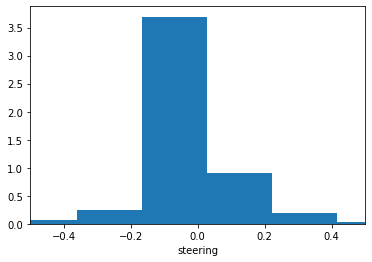

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = df['steering']
plt.hist(x, density=True)  # density=False would make counts
plt.xlim([-0.5, 0.5])
plt.xlabel('steering')

Text(0.5, 0, 'speed')

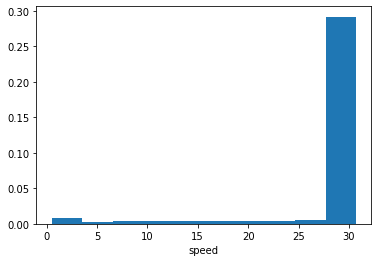

In [8]:
x = df['speed']
plt.hist(x, density=True)  # density=False would make counts
plt.xlabel('speed')

Text(0.5, 0, 'throttle')

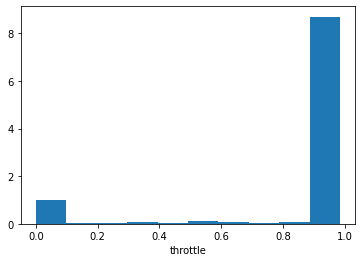

In [9]:
x = df['throttle']
plt.hist(x, density=True)  # density=False would make counts
plt.xlabel('throttle')

Text(0.5, 0, 'brake')

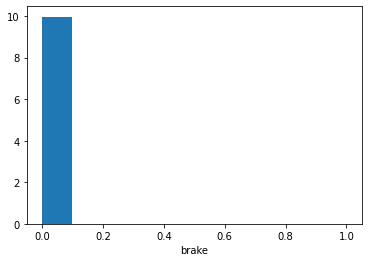

In [10]:
x = df['brake']
plt.hist(x, density=True)  # density=False would make counts
plt.xlabel('brake')

In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(df, test_size = 0.15, random_state=4)

print("The size of train dataset:",len(train_samples))
print("The size of validation dataset:",len(validation_samples))

The size of train dataset: 6830
The size of validation dataset: 1206


../input/udacity-simulator-steering-angle-data/data/IMG/center_2016_12_01_13_42_12_370.jpg


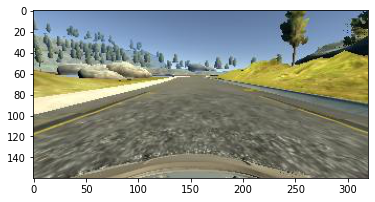

In [12]:
import cv2
import matplotlib.pyplot as plt
print(imgs[0])
image = plt.imread(imgs[0])
plt.imshow(image)
plt.show()

../input/udacity-simulator-steering-angle-data/data/IMG/center_2016_12_01_13_42_12_370.jpg
(160, 320, 3)


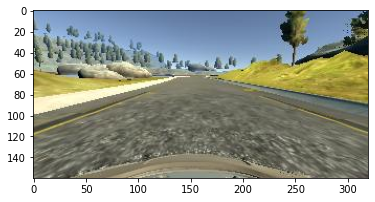

In [13]:
import cv2
import matplotlib.pyplot as plt

print(imgs[0])
ex = cv2.imread(imgs[0])
ex = cv2.cvtColor(ex,cv2.COLOR_RGB2BGR)
plt.imshow(ex)
print(ex.shape)
plt.show()

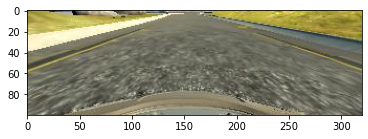

In [14]:
# Cắt bỏ phần trời
x = 0
y = 60
h = 100
w = 320
crop_img = image[y:y+h, x:x+w]
plt.imshow(crop_img)
plt.show()

In [15]:
import cv2
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# Data generator
def generator(dataframe, samples, batch_size=32):
    num_samples = len(samples)
    while 1: 
        shuffle(samples) # shuffling the total images
        for offset in range(0, num_samples, batch_size):          
            batch_samples = samples.iloc[offset:offset+batch_size,:]
            images = []
            angles = []
            for index in batch_samples.index:
                # We are taking 3 images, first one is center, second is left and third is right
                for i in range(0,3): 
                    name = IMG_DIR + dataframe.iloc[index,i].split('/')[-1]
                    # Since CV2 reads an image in BGR we need to convert it to RGB since in drive.py it is RGB                       
                    ex = cv2.imread(name)
                    center_image = cv2.cvtColor(ex,cv2.COLOR_BGR2RGB)
                    images.append(center_image)
                    # Getting the steering angle measurement                        
                    center_angle = float(dataframe.iloc[index,3])                   
 
                    # Image is in center
                    if(i==0):
                        angles.append(center_angle)
                    # Image is in left
                    elif(i==1):
                        angles.append(center_angle + 0.2)
                    # Image is in right
                    elif(i==2):
                        angles.append(center_angle - 0.2)
                    
                    # Code for Augmentation of data.
                    # We take the image and just flip it and negate the measurement
                    images.append(cv2.flip(center_image,1))
                    if(i==0):
                        angles.append(-center_angle)
                    elif(i==1):
                        angles.append(-(center_angle + 0.2))
                    elif(i==2):
                        angles.append(-(center_angle - 0.2))   
            X_train = np.array(images)
            y_train = np.array(angles)
            # Here we do not hold the values of X_train and y_train instead we yield the values which means we hold until the generator is running
            yield sklearn.utils.shuffle(X_train, y_train) 
    

In [16]:
# Using the generator function to create "train_generator" and "validation_generator" with batch_size = 32 or 64 or 128,...
train_generator = generator(df,train_samples, batch_size=32)
validation_generator = generator(df,validation_samples, batch_size=32)

In [17]:
len(train_samples)

6830

# Build Nvidia-CNN Deep Learning Model 

![](https://developer.nvidia.com/blog/parallelforall/wp-content/uploads/2016/08/cnn-architecture-624x890.png)

In [19]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers import Lambda, Cropping2D

model = Sequential()

# Preprocess incoming data, centered around zero with small standard deviation 
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))

# crop image to only see section with road use Cropping2D
model.add(Cropping2D(cropping=((40, 20), (0, 0))))           

# Build CNN - Nvidia model in here
model.add(Conv2D(filters=24, kernel_size=(5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(36, (5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(48, (5, 5), strides=(2,2), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam')

# keras method to print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_2 (Cropping2D)    (None, 100, 320, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 158, 24)       1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 77, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 37, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 35, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 5, 33, 64)        

# Training Nvidia-CNN Deep Learning Model

In [23]:
history = model.fit_generator(train_generator, epochs=1, steps_per_epoch=len(train_samples)//32,
                              validation_data = validation_generator, validation_steps=len(validation_samples)//32)

Epoch 1/1
213/213 [==============================] - 661s 3s/step - loss: 0.0154 - val_loss: 0.0167


In [ ]:
# Saving model
model.save('model.h5')
print('Done! Model Saved!')

# Evaluate Nvidia-CNN Deep Learning Model

In [ ]:
model = keras.models.load_model('model.h5')

In [24]:
from sklearn.metrics import r2_score
evaluate = []
for i in validation_generator:
  evaluate.append(r2_score(i[1],model.predict(i[0])))
  if(len(evaluate)==200):
    break;

In [25]:
evaluate_t = []
for i in train_generator:
  evaluate_t.append(r2_score(i[1],model.predict(i[0])))
  if(len(evaluate_t)==200):
    break;

In [26]:
print(len(evaluate_t))

200


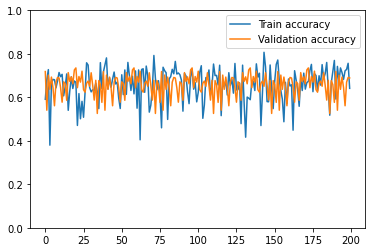

In [27]:
from matplotlib import pyplot as plt

x = []
for i in range(0,200):
  x.append(i)
plt.plot(x,evaluate_t,label = 'Train accuracy')
plt.plot(x,evaluate,label = 'Validation accuracy')
plt.ylim([0, 1])

plt.legend()
plt.show()